## Kaggle House Prices: Advanced Regression Techniques dataset

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df = df[["GrLivArea", "SalePrice"]]
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [46]:
X = df[["GrLivArea"]]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Coefficients: [102.48895892]
Intercept: 24899.74815733821
Mean Squared Error: 3418946311.1808066
R² Score: 0.5542632452871117


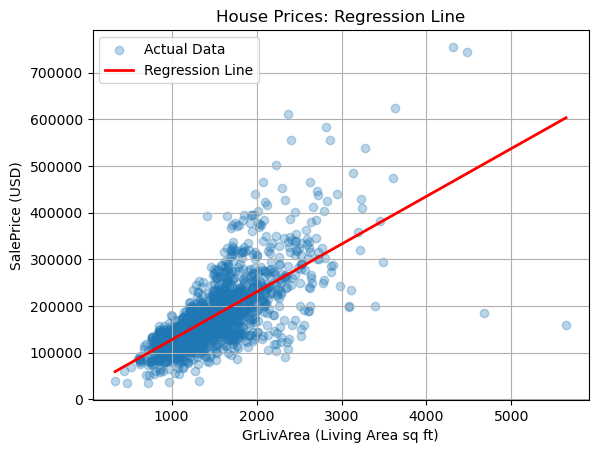

In [50]:
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.3, label='Actual Data')

# Create a range of values for GrLivArea
gr_range = np.linspace(df['GrLivArea'].min(), df['GrLivArea'].max(), 200)

# Convert to DataFrame with ONE column (same as training)
X_line = pd.DataFrame({'GrLivArea': gr_range})

# Predict using the model
price_line = model.predict(X_line)

# Plot regression line
plt.plot(gr_range, price_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel("GrLivArea (Living Area sq ft)")
plt.ylabel("SalePrice (USD)")
plt.title("House Prices: Regression Line")
plt.legend()
plt.grid(True)
plt.show()


## Q)2

In [52]:
values = [0, 1, 2, 3, 4, 5]
freq = [27, 96, 58, 54, 18, 7]

num = 0
denm = 0

for i in range(len(values)):
    num += values[i] * freq[i]
    denm += freq[i]

mean = num/denm

total = sum(freq)
median_pos = total // 2

cumm = 0
median = None

for i in range(len(values)):
    cumm += freq[i]
    if cumm >= median_pos:
        median = values[i]
        break

mode = values[freq.index(max(freq))]
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)



Mean: 1.85
Median: 2
Mode: 1


## Q)3

In [54]:
ranges = [
     "59.95-61.95",
     "61.95-63.95",
     "63.95-65.95",
     "65.95-67.95",
     "67.95-69.95",
     "69.95-71.95",
     "71.95-73.95",
     "73.95-75.95"
]

freq = [5, 3, 15, 40, 17, 12, 7, 1]

# (a) % of players < 65.95 inches

a = freq[0] + freq[1] + freq[2]
ans = (a/100) * 100
print(ans)

# (b) % between 61.95 and 65.95 inches

b = freq[1] + freq[2]
ans2 = (b/100) * 100
print(ans2)

# (c) Number of players between 61.95 and 71.95 inches

c = freq[1] + freq[2] + freq[3] + freq[4] + freq[5]
ans3 = (c/100) * 100
print(ans3)

23.0
18.0
87.0


## Q)4

In [ ]:
# Variance
data = [46, 69, 32, 60, 52, 41]

numerator = 0

for i in range (len(data)):
    numerator += data[i]

mean = numerator/len(data)

variance = sum((x - mean) ** 2 for x in data) / len(data)

print("mean: ",mean)
print("variance: ", variance)

mean:  50.0
variance:  147.66666666666666
